In [1]:
from IPython.display import display
from vdom.helpers import h1, p, img, div, b, li, ul, h2, h3, h4, h5, a
from IPython.display import display, HTML

with open ("custom.css", "r") as myfile:
    custom_css = myfile.read().replace('\n', '')

title = '<h1>Olympic Games Analysis</h1>'
indexes = ({1: {'name': {'Introduction'}},
            2: {'name': {'Requirements'}},
            3: {'name': {'Data Cleaning'}},
            4: {'name': {'Male Analysis'}},
            5: {'name': {'Physique', 'Age', 'Winning Density based on physique'}},
            6: {'name': {'Female Analysis'}},
            7: {'name': {'Physique', 'Age', 'Winning Density based on physique'}},
            8: {'name': {'Gender Gap'}},
            9: {'name': {'Geographic Analysis'}},
            })
          
links =   ({1: {'link': {'#introduction'}},
            2: {'link': {'#requirements'}},
            3: {'link': {'#data_cleaning'}},
            4: {'link': {'#male_analysis'}},
            5: {'link': {'#physique_male', '#age_male', '#winning_male_density_physique'}},
            6: {'link': {'#female_analysis'}},
            7: {'link': {'#physique_female', '#age_female', '#winning_female_density_physique'}},
            8: {'link': {'#gender_gap'}},
            9: {'link': {'#geographic_analysis'}},
            })


def listIndex(indexes):
    html = custom_css
    html += title
    html += '<img src="img/olympics-animation.jpg">'
    html += '<ul class="unstyled">'
    
    for x in range(1, 9):
        try:
        
            index_len = len(indexes[x]['name'])
            if index_len > 1:
                html += '<ul>'
                pass
            for i, j in zip(indexes[x]['name'], links[x]['link']):
                html += '<li><a href="' + j + '">' + i + '</a></li>'
            if index_len > 1:
                html += '</ul>'
                pass
        except Exception:
            break
    html += '</ul>'
    
    return html

display(HTML(listIndex(indexes)))

<h1> Requirements </h1>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [24]:
dataset = pd.read_csv('datasets/athlete_events.csv')
dataset.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
118177,59797,Kim Cheol-Gyun,M,23.0,180.0,82.0,South Korea,KOR,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's Pole Vault,NaN
187730,94339,Grald Pfefferle,M,28.0,194.0,93.0,Switzerland,SUI,1988 Summer,1988,Summer,Seoul,Fencing,"Fencing Men's epee, Team",NaN
118839,60152,Kim Min-Seok,M,17.0,182.0,75.0,South Korea,KOR,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,NaN
138660,69653,Einar Liberg,M,50.0,NaN,NaN,Norway,NOR,1924 Summer,1924,Summer,Paris,Shooting,"Shooting Men's Running Target, Double Shot",NaN
191932,96368,Vladislav Posedkin,M,27.0,182.0,84.0,Russia,RUS,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [25]:
dataset.columns = dataset.columns.str.lower()
print(dataset.info())
print(dataset.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
id        271116 non-null int64
name      271116 non-null object
sex       271116 non-null object
age       261642 non-null float64
height    210945 non-null float64
weight    208241 non-null float64
team      271116 non-null object
noc       271116 non-null object
games     271116 non-null object
year      271116 non-null int64
season    271116 non-null object
city      271116 non-null object
sport     271116 non-null object
event     271116 non-null object
medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
None
Index(['id', 'name', 'sex', 'age', 'height', 'weight', 'team', 'noc', 'games',
       'year', 'season', 'city', 'sport', 'event', 'medal'],
      dtype='object')


In [26]:
dataset.describe()

,id,age,height,weight,year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


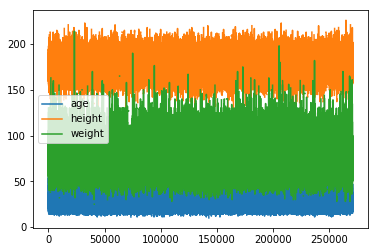

In [27]:
%matplotlib inline
dataset = dataset.drop(columns=['id', 'year'])
dataset.plot()

In [28]:
dataset.isnull().sum()

name           0
sex            0
age         9474
height     60171
weight     62875
team           0
noc            0
games          0
season         0
city           0
sport          0
event          0
medal     231333
dtype: int64

In [29]:
print('Number of rows: ' + str(dataset.shape[0]))
print('Number of columns: ' + str(dataset.shape[1]))

Number of rows: 271116
Number of columns: 13


<h1> Frequency of Country Participation and Sport Activity </h1>

In [30]:
dataset.noc.value_counts(dropna=False).head()

USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
Name: noc, dtype: int64

In [31]:
dataset.sport.value_counts(dropna=False).head()

Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10859
Name: sport, dtype: int64